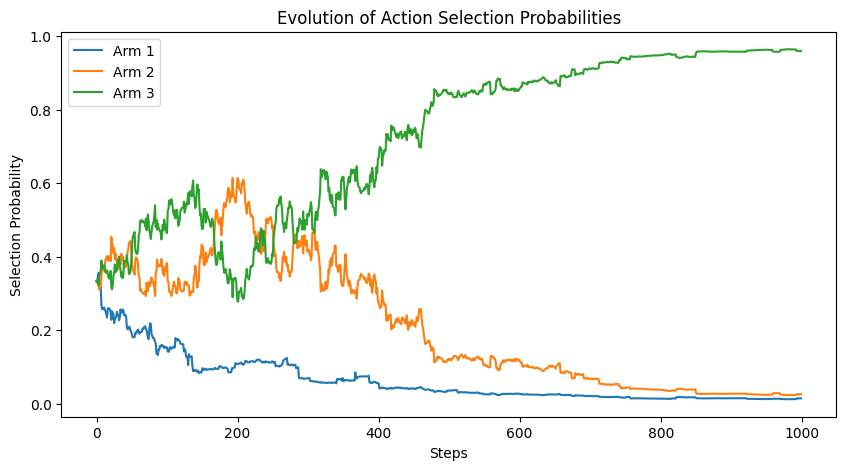

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class GradientBandit:
    def __init__(self, k_arms, alpha):
        self.k = k_arms
        self.alpha = alpha
        self.H = np.zeros(k_arms)  # Initialize preferences to zero
        self.average_reward = 0
        self.t = 0
    
    def select_action(self):
        # Compute probabilities using softmax
        exp_H = np.exp(self.H)
        self.probs = exp_H / np.sum(exp_H)
        return np.random.choice(self.k, p=self.probs)
    
    def update(self, action, reward):
        self.t += 1
        # Update average reward
        self.average_reward += (reward - self.average_reward) / self.t
        
        # Compute reward difference
        reward_diff = reward - self.average_reward
        
        # Update preferences
        for a in range(self.k):
            if a == action:
                self.H[a] += self.alpha * reward_diff * (1 - self.probs[a])
            else:
                self.H[a] -= self.alpha * reward_diff * self.probs[a]

# Example usage
np.random.seed(42)
k_arms = 3
true_rewards = [0.3, 0.5, 0.7]
n_steps = 1000

bandit = GradientBandit(k_arms, alpha=0.1)
rewards = []
chosen_actions = np.zeros((n_steps, k_arms))

for step in range(n_steps):
    action = bandit.select_action()
    reward = np.random.normal(true_rewards[action], 1)
    bandit.update(action, reward)
    rewards.append(reward)
    chosen_actions[step] = bandit.probs

# Plot results
plt.figure(figsize=(10, 5))
for i in range(k_arms):
    plt.plot(chosen_actions[:, i], label=f'Arm {i+1}')
plt.xlabel('Steps')
plt.ylabel('Selection Probability')
plt.title('Evolution of Action Selection Probabilities')
plt.legend()
plt.show()

In [4]:
import React, { useState } from 'react';
import { Card, CardContent, CardHeader } from '@/components/ui/card';
import { Slider } from '@/components/ui/slider';
import { LineChart, Line, XAxis, YAxis, CartesianGrid, Legend, ResponsiveContainer } from 'recharts';

export default function GradientBanditViz() {
  const [alpha, setAlpha] = useState(0.1);
  const [rewardDiff, setRewardDiff] = useState(0);
  
  const generateData = () => {
    const data = [];
    let prob = 0.5;  // Start with 50% probability
    
    for (let i = 0; i < 10; i++) {
      const update = alpha * rewardDiff * (1 - prob);
      prob += update;
      prob = Math.max(0, Math.min(1, prob));  // Ensure prob stays between 0 and 1
      data.push({
        step: i,
        probability: prob,
      });
    }
    return data;
  };

  return (
    <div className="space-y-4">
      <Card className="p-4">
        <CardHeader>Gradient Bandit Update Visualization</CardHeader>
        <CardContent>
          <div className="space-y-4">
            <div>
              <label className="block mb-2">Learning Rate (α): {alpha}</label>
              <Slider 
                value={[alpha]} 
                onValueChange={([value]) => setAlpha(value)}
                min={0}
                max={1}
                step={0.1}
              />
            </div>
            <div>
              <label className="block mb-2">Reward Difference (Rt - R̄t): {rewardDiff}</label>
              <Slider 
                value={[rewardDiff]} 
                onValueChange={([value]) => setRewardDiff(value)}
                min={-1}
                max={1}
                step={0.1}
              />
            </div>
            <div className="h-64">
              <ResponsiveContainer width="100%" height="100%">
                <LineChart data={generateData()}>
                  <CartesianGrid strokeDasharray="3 3" />
                  <XAxis dataKey="step" />
                  <YAxis domain={[0, 1]} />
                  <Legend />
                  <Line 
                    type="monotone" 
                    dataKey="probability" 
                    stroke="#8884d8" 
                    name="Action Probability"
                  />
                </LineChart>
              </ResponsiveContainer>
            </div>
          </div>
        </CardContent>
      </Card>
    </div>
  );
}

SyntaxError: invalid syntax (1819131778.py, line 1)

In [9]:
import numpy as np

def simulate_updates(alpha, true_reward, n_steps):
    preference = 0
    avg_reward = 0
    probabilities = []
    
    for t in range(n_steps):
        # Convert preference to probability using softmax
        prob = 1 / (1 + np.exp(-preference))
        probabilities.append(prob)
        
        # Get reward (simplified for demonstration)
        reward = np.random.normal(true_reward, 1)
        
        # Update average reward
        avg_reward += (reward - avg_reward) / (t + 1)
        
        # Update preference
        reward_diff = reward - avg_reward
        preference += alpha * reward_diff * (1 - prob)
    
    return probabilities

# Compare different learning rates
n_steps = 100
true_reward = 0.7

results = {
    'α = 0.1': simulate_updates(0.1, true_reward, n_steps),
    'α = 0.5': simulate_updates(0.5, true_reward, n_steps),
    'α = 0.9': simulate_updates(0.9, true_reward, n_steps)
}

# Print some key statistics
for alpha, probs in results.items():
    print(f"{alpha}:")
    print(f"  Final probability: {probs[-1]:.3f}")
    print(f"  Convergence speed: {next((i for i, p in enumerate(probs) if abs(p - probs[-1]) < 0.05), n_steps)} steps")

α = 0.1:
  Final probability: 0.580
  Convergence speed: 72 steps
α = 0.5:
  Final probability: 0.072
  Convergence speed: 11 steps
α = 0.9:
  Final probability: 0.719
  Convergence speed: 11 steps
